<a href="https://colab.research.google.com/github/AleemRahil/Reinforcement-Learning-with-Sentiment-Analysis/blob/main/Reinforcement_Learning_with_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import os
import math
import time
import random
import numpy as np
import pandas as pd
from pylab import plt
from IPython import display
plt.style.use('seaborn')
np.set_printoptions(precision=4, suppress=True)
os.environ['PYTHONHASHSEED'] = '0'

<ipython-input-9-d08e1ed8c8c4>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [10]:
import gym
env = gym.make('CartPole-v0')


/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [11]:
env.observation_space


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Box([-4.8000e+00 -3.4028e+38 -4.1888e-01 -3.4028e+38], [4.8000e+00 3.4028e+38 4.1888e-01 3.4028e+38], (4,), float32)

In [53]:
env.observation_space.shape[0]

4

In [12]:
env.observation_space.low.astype(np.float16)


array([-4.8  ,   -inf, -0.419,   -inf], dtype=float16)

In [13]:
env.observation_space.high.astype(np.float16)


array([4.8  ,   inf, 0.419,   inf], dtype=float16)

In [14]:
state = env.reset()


In [15]:
state # [cart position, cart velocity, pole angle, pole angular velocity]


array([ 0.0462, -0.0158, -0.0416,  0.0211], dtype=float32)

In [16]:
env.action_space


Discrete(2)

In [17]:
env.action_space.n

2

In [18]:
env.action_space.sample()

1

In [19]:
env.action_space.sample()

0

In [20]:
a = env.action_space.sample()
a

1

In [21]:
state, reward, done, info = env.step(a)
state, reward, done, info

(array([ 0.0459,  0.1799, -0.0412, -0.2844], dtype=float32), 1.0, False, {})

In [22]:
env.reset()
for e in range(1, 200):
  a = env.action_space.sample()
  state, reward, done, info = env.step(a) #<2>
  print(f'step={e:2d} | state={state} | action={a} | reward={reward}')
  if done and (e + 1) < 200:
    print('*** FAILED ***')
    break

step= 1 | state=[ 0.      0.1801  0.0457 -0.2982] | action=1 | reward=1.0
step= 2 | state=[ 0.0036  0.3745  0.0397 -0.5761] | action=1 | reward=1.0
step= 3 | state=[ 0.0111  0.1789  0.0282 -0.2712] | action=0 | reward=1.0
step= 4 | state=[ 0.0147 -0.0166  0.0228  0.0303] | action=0 | reward=1.0
step= 5 | state=[ 0.0144 -0.2121  0.0234  0.3301] | action=0 | reward=1.0
step= 6 | state=[ 0.0101 -0.4075  0.03    0.63  ] | action=0 | reward=1.0
step= 7 | state=[ 0.002  -0.2128  0.0426  0.3469] | action=1 | reward=1.0
step= 8 | state=[-0.0023 -0.4085  0.0495  0.6527] | action=0 | reward=1.0
step= 9 | state=[-0.0104 -0.6043  0.0626  0.9606] | action=0 | reward=1.0
step=10 | state=[-0.0225 -0.8002  0.0818  1.2723] | action=0 | reward=1.0
step=11 | state=[-0.0385 -0.6062  0.1072  1.0063] | action=1 | reward=1.0
step=12 | state=[-0.0507 -0.8026  0.1274  1.3306] | action=0 | reward=1.0
step=13 | state=[-0.0667 -0.9991  0.154   1.6603] | action=0 | reward=1.0
step=14 | state=[-0.0867 -1.1956  0.18

In [23]:
done

True

*** FAILED ***


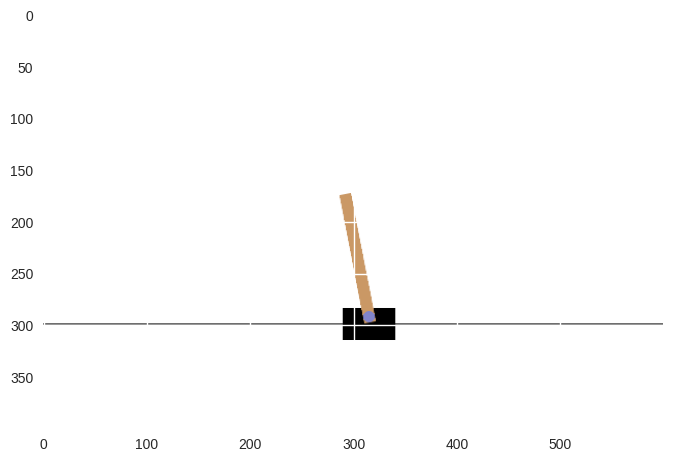

In [24]:
env.reset()
img = plt.imshow(env.render(mode='rgb_array')) # initialize bitmap embedding
for e in range(100):
  img.set_data(env.render(mode='rgb_array')) # updating the data
  display.display(plt.gcf())
  display.clear_output(wait=True)
  a = env.action_space.sample() # random action choice
  obs, rew, done, _ = env.step(a) # taking action
  if done and (e + 1) < 200:
    print('*** FAILED ***')
    break

In [25]:
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [26]:
def set_seeds(seed=100):
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)
  env.seed(seed)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
from collections import deque

In [35]:
class DQLAgent:
  def __init__(self, gamma=0.95, lr=0.001, finish=1e10):
    self.finish = finish
    self.epsilon = 1.0
    self.epsilon_min = 0.01
    self.epsilon_decay = 0.995
    self.gamma = gamma
    self.batch_size = 32
    self.lr = lr
    self.max_treward = 0
    self.averages = list()
    self.memory = deque(maxlen=2000)
    self.osn = env.observation_space.shape[0]
    self.model = self._build_model()

  def _build_model(self):
    model = Sequential()
    model.add(Dense(24, input_dim=self.osn,
                    activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(env.action_space.n, activation='linear'))
    model.compile(loss='mse', optimizer=Adam(lr=self.lr))
    return model

  def act(self, state):
    if random.random() <= self.epsilon:
      return env.action_space.sample()
    action  = self.model.predict(state)[0]
    return np.argmax(action)

  def replay(self):
    batch = random.sample(self.memory, self.batch_size)
    for state, action, reward, next_state, done in batch:
      if not done:
        reward += self.gamma * np.amax(
            self.model.predict(next_state)[0])
        target = self.model.predict(state)
        target[0, action] = reward
        self.model.fit(state, target, epochs=1, verbose=False)
    if self.epsilon > self.epsilon_min:
      self.epsilon *= self.epsilon_decay

  def learn(self, episodes, max_iter=200):
    trewards = []
    for e in range(1, episodes + 1):
      state = env.reset()
      state = np.reshape(state, [1, self.osn])
      for _ in range(max_iter):
        action = self.act(state)
        next_state, reward, done, info = env.step(action)
        next_state = np.reshape(next_state, [1, self.osn])
        self.memory.append([state, action, reward, next_state, done])
        state = next_state
        if done:
          treward = _ + 1
          trewards.append(treward)
          av = sum(trewards[-25:]) / 25
          self.averages.append(av)
          self.max_treward = max(self.max_treward, treward)
          templ = 'episode: {:4d}/{} | treward: {:4d} | av: {:6.1f} | max: {:4d}'
          print(templ.format(e, episodes, treward, av, self.max_treward), end='\r')
          break
      if av > self.finish:
        print()
        break
      if len(self.memory) > self.batch_size:
        self.replay()

  def test(self, episodes, max_iter=200):
    trewards = []
    for e in range(1, episodes + 1):
      state = env.reset()
      for _ in range(max_iter):
        state = np.reshape(state, [1, self.osn])
        action = np.argmax(self.model.predict(state)[0])
        next_state, reward, done, info = env.step(action)
        state = next_state
        if done:
          treward = _ + 1
          trewards.append(treward)
          print('episode: {:4d}/{} | treward: {:4d}'.format(e, episodes, treward), end='\r')
          time.sleep(0.05)
          break
    return trewards


In [36]:
set_seeds(100)
agent = DQLAgent (lr = 0.001, finish=195)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [37]:
episodes = 1000

In [ ]:
%time agent.learn(episodes)

In [39]:
agent.epsilon

0.5344229416520513

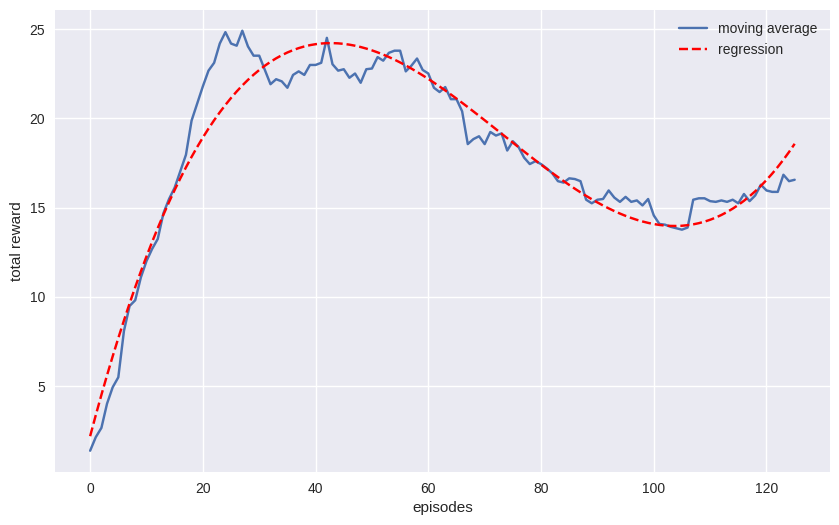

In [40]:
plt.figure(figsize=(10,6))
x = range(len(agent.averages))
y = np.polyval(np.polyfit(x, agent.averages, deg=3), x)
plt.plot(agent.averages, label='moving average')
plt.plot(x, y, 'r--', label='regression')
plt.xlabel('episodes')
plt.ylabel('total reward')
plt.legend();

In [ ]:
trewards = agent.test(100)

In [42]:
sum(trewards)/len(trewards)

9.26

In [57]:
class observation_space:
  def __init__(self, n):
    self.shape = (n,)

In [58]:
class action_space:
  def __init__(self, n):
    self.n = n
  def sample(self):
    return random.randint(0, self.n -1)

In [59]:
class Finance:
  url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'

  def __init__(self, symbol, features):
    self.symbol = symbol
    self.features = features
    self.observation_space = observation_space(4)
    self.osn = self.observation_space.shape[0]
    self.action_space = action_space(2)
    self.min_accuracy = 0.5
    self._get_data()
    self._prepare_data()

  def _get_data(self):
    self.raw = pd.read_csv(self.url, index_col =0, parse_dates=True).dropna()

  def _prepare_data(self):
    self.data = pd.DataFrame(self.raw[self.symbol])
    self.data['r'] = np.log(self.data / self.data.shift(1))
    self.data.dropna(inplace=True)
    self.data = (self.data - self.data.mean())/self.data.std()
    self.data['d'] = np.where(self.data['r'] > 0, 1, 0)

  def _get_state(self):
    return self.data[self.features].iloc[self.bar - self.osn:self.bar].values

  def seed(self, seed =None):
    pass

  def reset(self):
    self.treward =0
    self.accuracy = 0
    self.bar = self.osn
    state = self.data[self.features].iloc[self.bar - self.osn:self.bar]
    return state.values

  def step(self, action):
    correct = action == self.data['d'].iloc[self.bar]
    reward = 1 if correct else 0
    self.treward += reward
    self.bar += 1
    self.accuracy = self.treward / (self.bar - self.osn)
    if self.bar >= len(self.data):
      done = True
    elif reward == 1:
      done = False
    elif (self.accuracy < self.min_accuracy and self.bar > self.osn + 10):
      done = True
    else:
      done = False
    state = self._get_state()
    info = {}
    return state, reward, done, info


In [60]:
env = Finance('EUR=', 'r')

In [61]:
env.reset()

array([-0.5125,  0.5603, -1.1434,  1.1788])

In [63]:
a = env.action_space.sample()
a

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [64]:
env.step(a)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([ 0.5603, -1.1434,  1.1788,  1.2569]), 0, False, {})

In [65]:
set_seeds(100)
agent = DQLAgent(lr=0.001, gamma=0.5, finish=2400)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [66]:
episodes=1000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
%time agent.learn(episodes, max_iter=2600)

In [68]:
agent.epsilon

0.9091562615825302

In [ ]:
agent.test(3, max_iter=2600)

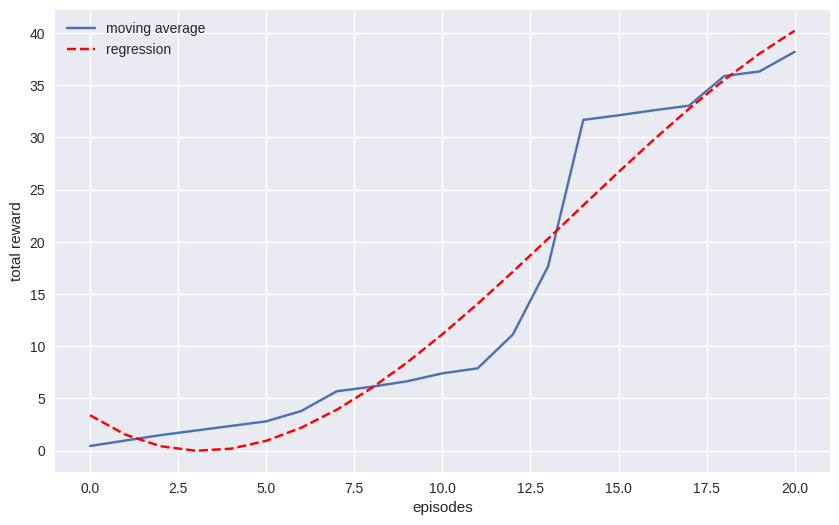

In [70]:
plt.figure(figsize=(10,6))
x = range(len(agent.averages))
y = np.polyval(np.polyfit(x, agent.averages, deg=3), x)
plt.plot(agent.averages, label='moving average')
plt.plot(x, y, 'r--', label = 'regression')
plt.xlabel('episodes')
plt.ylabel('total reward')
plt.legend();